## Load the Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")
pd.pandas.set_option('display.max_columns',None)

#Supress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_percentage_error

#import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance


In [3]:
house_price= pd.read_excel('HousePriceoutput.xlsx')
house_price.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,furnished,total_area,renovated,building_age
0,735000,4,2.75,3040,2415,2.0,1,4,3,8,3040.0,0.0,0,5455,0,48
1,257000,3,2.50,1740,3721,2.0,0,0,3,8,1740.0,0.0,0,5461,0,5
2,466000,2,1.50,1140,1058,3.0,0,0,3,7,1140.0,0.0,0,2198,0,9
3,1160000,4,3.50,4680,9700,2.0,0,0,3,10,3360.0,1.0,1,14380,0,9
4,449950,4,2.50,3100,10000,2.0,0,0,3,9,3100.0,0.0,1,13100,0,36


## Linear Regression with Stats Model

In [4]:
import statsmodels.formula.api as SM

In [5]:
House_Price_allvar = pd.get_dummies(house_price, drop_first=True)
House_Price_allvar.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,furnished,total_area,renovated,building_age
0,735000,4,2.75,3040,2415,2.0,1,4,3,8,3040.0,0.0,0,5455,0,48
1,257000,3,2.50,1740,3721,2.0,0,0,3,8,1740.0,0.0,0,5461,0,5
2,466000,2,1.50,1140,1058,3.0,0,0,3,7,1140.0,0.0,0,2198,0,9
3,1160000,4,3.50,4680,9700,2.0,0,0,3,10,3360.0,1.0,1,14380,0,9
4,449950,4,2.50,3100,10000,2.0,0,0,3,9,3100.0,0.0,1,13100,0,36


In [6]:
f_1 = 'price~room_bed+room_bath+living_measure+lot_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+furnished+total_area+renovated+building_age'

In [7]:
OLSmodel_1 = SM.ols(f_1,data=House_Price_allvar).fit()
OLSmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     2724.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:30:01   Log-Likelihood:            -2.9196e+05
No. Observations:               21288   AIC:                         5.839e+05
Df Residuals:                   21273   BIC:                         5.841e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.073e+06      2e+04    -53.557      0.000   -1.11e+06   -1.03e+06
room_bed       -2.393e+04   2010.597    -11.900      0.000   -2.79e+04      -2e+04
room_bath       7.339e+04   3463.415     21.189      0.000    6.66e+04    8.02e+04
living_measure   109.9938      4.607     23.876      0.000     100.964     119.024
lot_measure      -55.1400      2.305    -23.927      0.000     -59.657     -50.623
ceil            3.275e+04   3808.411      8.599      0.000    2.53e+04    4.02e+04
coast           5.893e+05   1.91e+04     30.882      0.000    5.52e+05    6.27e+05
sight           4.357e+04   2304.129     18.908      0.000    3.91e+04    4.81e+04
condition       1.854e+04   2562.479      7.236      0.000    1.35e+04    2.36e+04
quality         1.294e+05   2668.637     48.500      0.000    1.24e+05    1.35e+05
ceil_measure     -45.5894      7.341     -6.210      0.000     -59.978     -31.201
basement       -1.366e+04   5531.987     -2.469      0.014   -2.45e+04   -2813.801
furnished        5.03e+04   6302.772      7.980      0.000    3.79e+04    6.27e+04
total_area        54.8538      2.303     23.823      0.000      50.341      59.367
renovated       2.286e+05   7727.446     29.577      0.000    2.13e+05    2.44e+05
building_age    3734.9237     73.494     50.819      0.000    3590.869    3878.978
==============================================================================
Omnibus:                    15994.843   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1068606.955
Skew:                           3.033   Prob(JB):                         0.00
Kurtosis:                      37.175   Cond. No.                     4.15e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.64e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula="y~x", data=x_vars).fit().rsquared
        vif = round(1 / (1 - rsq), 2)
        print(xvar_names[i], " VIF = ", vif)

In [9]:
vif_cal(input_data= House_Price_allvar.drop('price', axis=1))

room_bed  VIF =  1.55
room_bath  VIF =  3.15
living_measure  VIF =  inf
lot_measure  VIF =  inf
ceil  VIF =  1.88
coast  VIF =  1.2
sight  VIF =  1.38
condition  VIF =  1.24
quality  VIF =  4.38
ceil_measure  VIF =  14.9
basement  VIF =  3.22
furnished  VIF =  2.79
total_area  VIF =  inf
renovated  VIF =  1.07
building_age  VIF =  2.0


The above values corroborates our understanding of vif. Since there was a presence of multicollinearity we see that the vif values are very high in living_measure, lot_measure, ceil_measure, basement & total_area .

If variables are decided to be dropped on the basis of vif, we will drop them one by one. After one variable is dropped we are going to run the regression model and the vif function. Then if needed we will drop more variables.

Dropping variables means losing out on information. That can hamper the predictive as well as the descriptive power of the model.

**Dropping Features one by one**

In [10]:
House_Price_Drop_lot_measure = House_Price_allvar[[
'price', 'room_bed', 'room_bath','living_measure','ceil', 'coast', 'sight', 'condition', 'quality', 'basement',
    'furnished','total_area','renovated', 'building_age'
]]
House_Price_Drop_lot_measure.head()

,price,room_bed,room_bath,living_measure,ceil,coast,sight,condition,quality,basement,furnished,total_area,renovated,building_age
0,735000,4,2.75,3040,2.0,1,4,3,8,0.0,0,5455,0,48
1,257000,3,2.50,1740,2.0,0,0,3,8,0.0,0,5461,0,5
2,466000,2,1.50,1140,3.0,0,0,3,7,0.0,0,2198,0,9
3,1160000,4,3.50,4680,2.0,0,0,3,10,1.0,1,14380,0,9
4,449950,4,2.50,3100,2.0,0,0,3,9,0.0,1,13100,0,36


In [11]:
f_2 = 'price~room_bed+room_bath+living_measure+ceil+coast+sight+condition+quality+basement+furnished+total_area+renovated+building_age'

In [12]:
OLSmodel_2 = SM.ols(f_2,data=House_Price_Drop_lot_measure).fit()
OLSmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2925.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:30:02   Log-Likelihood:            -2.9198e+05
No. Observations:               21288   AIC:                         5.840e+05
Df Residuals:                   21274   BIC:                         5.841e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -1.08e+06      2e+04    -53.912      0.000   -1.12e+06   -1.04e+06
room_bed       -2.295e+04   2006.205    -11.439      0.000   -2.69e+04    -1.9e+04
room_bath       7.527e+04   3453.080     21.799      0.000    6.85e+04     8.2e+04
living_measure   126.9285      3.152     40.265      0.000     120.750     133.107
ceil            2.674e+04   3686.469      7.252      0.000    1.95e+04     3.4e+04
coast           5.885e+05   1.91e+04     30.812      0.000    5.51e+05    6.26e+05
sight           4.556e+04   2283.692     19.950      0.000    4.11e+04       5e+04
condition           2e+04   2553.931      7.831      0.000     1.5e+04     2.5e+04
quality         1.281e+05   2662.897     48.120      0.000    1.23e+05    1.33e+05
basement        1.292e+04   3507.961      3.684      0.000    6047.498    1.98e+04
furnished       4.893e+04   6304.495      7.762      0.000    3.66e+04    6.13e+04
total_area        -0.2942      0.044     -6.704      0.000      -0.380      -0.208
renovated       2.307e+05   7726.619     29.856      0.000    2.16e+05    2.46e+05
building_age    3744.4413     73.543     50.915      0.000    3600.291    3888.592
==============================================================================
Omnibus:                    16100.288   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1100419.049
Skew:                           3.058   Prob(JB):                         0.00
Kurtosis:                      37.687   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
vif_cal(input_data= House_Price_Drop_lot_measure.drop('price', axis=1))

room_bed  VIF =  1.54
room_bath  VIF =  3.13
living_measure  VIF =  3.23
ceil  VIF =  1.76
coast  VIF =  1.2
sight  VIF =  1.36
condition  VIF =  1.22
quality  VIF =  4.35
basement  VIF =  1.29
furnished  VIF =  2.79
total_area  VIF =  1.07
renovated  VIF =  1.06
building_age  VIF =  2.0


In [14]:
model_MLR_1_pred = OLSmodel_1.fittedvalues
model_MLR_2_pred = OLSmodel_2.fittedvalues

In [15]:
from sklearn import metrics

metrics.mean_squared_error(House_Price_allvar['price'], model_MLR_1_pred,squared=False)

218774.33439648466

In [16]:
metrics.mean_squared_error(House_Price_Drop_lot_measure['price'], model_MLR_2_pred,squared=False)

218972.56165284567

## Machine Learning Models

In [17]:
house_price.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'furnished', 'total_area', 'renovated', 'building_age'],
      dtype='object')

In [18]:
house_price.shape

(21288, 16)

In [19]:
# Copy all the predictor variables into X dataframe
X = house_price.drop('price', axis=1)

# Copy target into the y dataframe. 
y = house_price[['price']]

In [20]:
#Splitting the dataset into the traing set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_percentage_error

#import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

### Linear Reg

In [22]:
# Created a linear model
LR_model=LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [23]:
## Predict Train results
y_train_pred = LR_model.predict(X_train)

## Predict Test results
y_pred = LR_model.predict(X_test)

In [24]:
LR_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False)
LR_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
LR_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for MultiLinear Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for MultiLinear Regression:
*******************************
Root mean squared error:  219827.71250717045
R-squared:  0.6460459117961375
Mean Absolute Percentage Error:  0.2943065660232412


In [25]:
results_train = pd.DataFrame([['MultiLinear Reg Train', LR_RMSE_Train, LR_R2_Train, LR_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])
results_train

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Train,219827.712507,0.646046,0.294307


In [26]:
#entering metrics score to the metics dataframe
LR_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
LR_R2_Test = metrics.r2_score(y_test, y_pred) 
LR_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for MultiLinear Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for MultiLinear Regression:
*******************************
Root mean squared error:  216637.4420132624
R-squared:  0.630326219739109
Mean Absolute Percentage Error:  0.2935382169710143


In [27]:
results_test = pd.DataFrame([['MultiLinear Reg Test', LR_RMSE_Test, LR_R2_Test, LR_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])
results_test

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Test,216637.442013,0.630326,0.293538


In [28]:
#KFold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results = cross_val_score(LR_model, X_train, y_train, cv=kfold)
print(results)
accu_k_lr=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_lr, results.std()*100.0))

[0.65364522 0.64226535 0.65890947 0.61090368 0.66674257 0.65867588
 0.67755824 0.65668087 0.58162839 0.61280035]
Accuracy: 0.642% (2.873%)


### Random Forest Regression

In [29]:
#created a Random forest model
RF_model=RandomForestRegressor()
RF_model.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
y_pred = RF_model.predict(X_test)
print('Performance on training data using Random Forest:',RF_model.score(X_train,y_train))
print('Performance on testing data using Random Forest:',RF_model.score(X_test,y_test))
acc_RF=metrics.r2_score(y_test, y_pred)
print('Accuracy RF: ',acc_RF)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Random Forest: 0.9617565903819678
Performance on testing data using Random Forest: 0.7069175992233969
Accuracy RF:  0.7069175992233969
MSE:  37208154500.86364
MAE: 121857.3146361446


In [31]:
%%time
tuned_params = {
        'n_estimators': [400, 500, 600, 700, 800,1000],
    'max_features': [4,5,6,7],
    'min_samples_split': [2, 5, 10, 12, 13],
    'min_samples_leaf': [3, 4, 5],
    'max_depth': [3, 7, 9, 11, 13],
}

rf_model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

rf_model.fit(X_train, y_train)

CPU times: total: 22.8 s
Wall time: 2min 17s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 7, 9, 11, 13],
                                        'max_features': [4, 5, 6, 7],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [2, 5, 10, 12, 13],
                                        'n_estimators': [400, 500, 600, 700,
                                                         800, 1000]},
                   scoring='neg_mean_absolute_error')

In [32]:
rf_model.best_estimator_

RandomForestRegressor(max_depth=11, max_features=5, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=1000)

In [33]:
## Predict Train results
y_train_pred = rf_model.predict(X_train)

In [34]:
## Predict Test results
y_pred = rf_model.predict(X_test)

In [35]:
#entering metrics score to the metics dataframe
RF_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False)
RF_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
RF_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  153558.40408647357
R-squared:  0.8272853283933287
Mean Absolute Percentage Error:  0.22787853346205858


In [36]:
model_results = pd.DataFrame([['Random Forest Train', RF_RMSE_Train, RF_R2_Train, RF_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
results_train

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Train,219827.712507,0.646046,0.294307
1,Random Forest Train,153558.404086,0.827285,0.227879


In [37]:
#entering metrics score to the metics dataframe
RF_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
RF_R2_Test = metrics.r2_score(y_test, y_pred) 
RF_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  192314.2535739297
R-squared:  0.7086771447611129
Mean Absolute Percentage Error:  0.2594959590654819


In [38]:
model_results = pd.DataFrame([['Random Forest Test', RF_RMSE_Test, RF_R2_Test, RF_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Test,216637.442013,0.630326,0.293538
1,Random Forest Test,192314.253574,0.708677,0.259496


##### Feature Importance

In [39]:
## Building the model again with the best hyperparameters
rf_model = RandomForestRegressor(min_samples_split=5,
                                 n_estimators=1000,
                                 max_depth=11,
                                 max_features=7,
                                 min_samples_leaf=3)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features=7, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=1000)

In [40]:
pd.Series(rf_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

quality           0.308529
living_measure    0.177683
furnished         0.145278
room_bath         0.081725
building_age      0.067785
ceil_measure      0.041845
sight             0.037031
coast             0.030753
lot_measure       0.026352
total_area        0.023342
basement          0.019850
renovated         0.015592
condition         0.012504
room_bed          0.006686
ceil              0.005043
dtype: float64

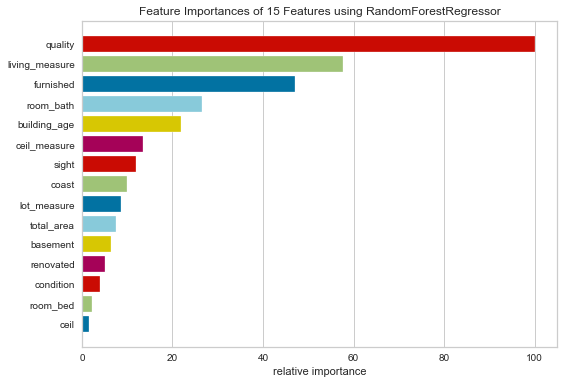

<AxesSubplot:title={'center':'Feature Importances of 15 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [41]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(rf_model)
viz.fit(X, y)
viz.show()

### Descision Tree Regression

In [42]:
#Created a Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [43]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using Decision Tree:',dt_model.score(X_train,y_train))
print('Performance on testing data using Decison Tree:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Decision Tree: 0.9999088043991257
Performance on testing data using Decison Tree: 0.43100240848470095
Accuracy DT:  0.43100240848470095
MSE:  72236852979.30269
MAE: 166988.35063410053


In [44]:
#reducing overfitting
tuned_params = {
    'min_samples_split': [ 7, 9 , 11], 
    'min_samples_leaf': [3,4,5], 
    'max_depth': [8, 9, 10]
}

dt_model = GridSearchCV(DecisionTreeRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

dt_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [7, 9, 11]},
             scoring='neg_mean_absolute_error')

In [45]:
dt_model.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=9)

In [46]:
## Predict Train results
y_train_pred = dt_model.predict(X_train)

In [47]:
## Predict Test results
y_pred = dt_model.predict(X_test)

In [48]:
#entering metrics score to the metics dataframe
DT_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
DT_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
DT_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  172733.1770739317
R-squared:  0.7814586741708324
Mean Absolute Percentage Error:  0.2454951100082352


In [49]:
model_results = pd.DataFrame([['Decision Tree Train', DT_RMSE_Train, DT_R2_Train, DT_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
results_train

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Train,219827.712507,0.646046,0.294307
1,Random Forest Train,153558.404086,0.827285,0.227879
2,Decision Tree Train,172733.177074,0.781459,0.245495


In [50]:
#entering metrics score to the metics dataframe
DT_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
DT_R2_Test = metrics.r2_score(y_test, y_pred) 
DT_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  217296.96656789034
R-squared:  0.6280719459133719
Mean Absolute Percentage Error:  0.272697585012572


In [51]:
model_results = pd.DataFrame([['Decision Tree Test', DT_RMSE_Test, DT_R2_Test, DT_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Test,216637.442013,0.630326,0.293538
1,Random Forest Test,192314.253574,0.708677,0.259496
2,Decision Tree Test,217296.966568,0.628072,0.272698


#### Feature Importance

In [52]:
dt_model = DecisionTreeRegressor(max_depth=9, min_samples_leaf=10, min_samples_split=11,random_state =1)

In [53]:
dt_model.fit(X_train, y_train)

pd.Series(dt_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

furnished         0.432823
quality           0.226266
living_measure    0.111878
building_age      0.076269
coast             0.040334
renovated         0.021401
room_bath         0.018417
sight             0.015221
lot_measure       0.014655
total_area        0.013667
basement          0.011585
ceil_measure      0.010288
condition         0.006112
ceil              0.000707
room_bed          0.000377
dtype: float64

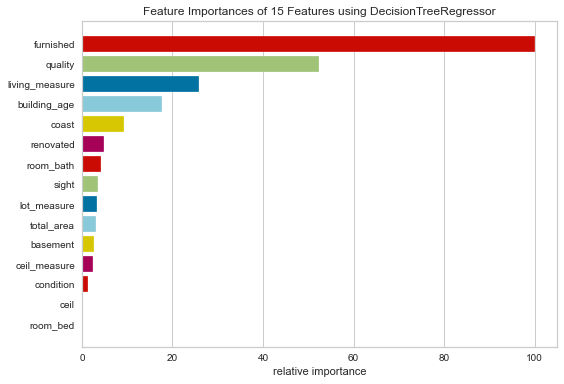

<AxesSubplot:title={'center':'Feature Importances of 15 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [54]:
viz = FeatureImportances(dt_model)
viz.fit(X, y)
viz.show()

### KNN 

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [56]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_Scaled = ss.fit_transform(X_train)
X_test_Scaled = ss.transform(X_test)

In [57]:
%%time

# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_Scaled, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 17.
CPU times: total: 1min 46s
Wall time: 1min 47s


In [58]:
knn_model = KNeighborsRegressor(n_neighbors = optimal_k)
knn_model.fit(X_train_Scaled, y_train)

KNeighborsRegressor(n_neighbors=17)

In [59]:
## Predict Train results
y_train_pred = knn_model.predict(X_train_Scaled)

## Predict Test results
y_pred = knn_model.predict(X_test_Scaled)

In [60]:
#entering metrics score to the metics dataframe
KNN_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
KNN_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
KNN_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for KNN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for KNN Regression:
*******************************
Root mean squared error:  197302.60101322184
R-squared:  0.7148668759397964
Mean Absolute Percentage Error:  0.2463389671937815


In [61]:
model_results = pd.DataFrame([['KNN Train', KNN_RMSE_Train, KNN_R2_Train, KNN_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
results_train

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Train,219827.712507,0.646046,0.294307
1,Random Forest Train,153558.404086,0.827285,0.227879
2,Decision Tree Train,172733.177074,0.781459,0.245495
3,KNN Train,197302.601013,0.714867,0.246339


In [62]:
#entering metrics score to the metics dataframe
KNN_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
KNN_R2_Test = metrics.r2_score(y_test, y_pred) 
KNN_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared err*or: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for KN Regression:
*******************************
Root mean squared err*or:  206965.64655129673
R-squared:  0.6625976216449065
Mean Absolute Percentage Error:  0.2649097873274767


In [63]:
model_results = pd.DataFrame([['KNN Test', KNN_RMSE_Test, KNN_R2_Test, KNN_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  216637.442013      0.630326  0.293538
1    Random Forest Test  192314.253574      0.708677  0.259496
2    Decision Tree Test  217296.966568      0.628072  0.272698
3              KNN Test  206965.646551      0.662598  0.264910


In [64]:
knn = KNeighborsRegressor()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_absolute_error', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_Scaled, y_train)

print(grid_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 17}


### LASSO Regression

In [65]:
from sklearn.linear_model import Lasso

In [66]:
#created a Lasso Regression model
las_model=Lasso(alpha=0.1)
las_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [67]:
y_pred = las_model.predict(X_test)
print('Performance on training data using Lasso Regression:',las_model.score(X_train,y_train))
print('Performance on testing data using Lasso Regression:',las_model.score(X_test,y_test))
acc_las=metrics.r2_score(y_test, y_pred)
print('Accuracy las: ',acc_las)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Lasso Regression: 0.6460459117819254
Performance on testing data using Lasso Regression: 0.6303262040941766
Accuracy las:  0.6303262040941766
MSE:  46931783268.24552
MAE: 140223.69819951185


In [68]:
%%time
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Lassso_model = RandomizedSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
Lassso_model.fit(X_train, y_train)

CPU times: total: 1.94 s
Wall time: 18.7 s


RandomizedSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000]},
                   scoring='neg_mean_absolute_error')

In [69]:
Lassso_model.best_estimator_

Lasso(alpha=1000)

In [70]:
## Predict Train results
y_train_pred = Lassso_model.predict(X_train)

## Predict Test results
y_pred = Lassso_model.predict(X_test)

In [71]:
#entering metrics score to the metics dataframe
Lasso_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Lasso_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Lasso_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  220268.59891041616
R-squared:  0.6446247075853007
Mean Absolute Percentage Error:  0.29460637044432453


In [72]:
model_results = pd.DataFrame([['Lasso Train', Lasso_RMSE_Train, Lasso_R2_Train, Lasso_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  219827.712507      0.646046  0.294307
1    Random Forest Train  153558.404086      0.827285  0.227879
2    Decision Tree Train  172733.177074      0.781459  0.245495
3              KNN Train  197302.601013      0.714867  0.246339
4            Lasso Train  220268.598910      0.644625  0.294606


In [73]:
#entering metrics score to the metics dataframe
Lasso_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
Lasso_R2_Test = metrics.r2_score(y_test, y_pred) 
Lasso_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  217050.0771587626
R-squared:  0.6289166234423993
Mean Absolute Percentage Error:  0.2941338692432985


In [74]:
model_results = pd.DataFrame([['Lasso Test', Lasso_RMSE_Test, Lasso_R2_Test, Lasso_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  216637.442013      0.630326  0.293538
1    Random Forest Test  192314.253574      0.708677  0.259496
2    Decision Tree Test  217296.966568      0.628072  0.272698
3              KNN Test  206965.646551      0.662598  0.264910
4            Lasso Test  217050.077159      0.628917  0.294134


### Ridge Regression

In [75]:
#created a Ridge regression model
from sklearn.linear_model import Ridge
rid_model=Ridge(alpha=0.1)
rid_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [76]:
y_pred = rid_model.predict(X_test)
print('Performance on training data using Ridge Regression:',rid_model.score(X_train,y_train))
print('Performance on testing data using Ridge Regression:',rid_model.score(X_test,y_test))
acc_rid=metrics.r2_score(y_test, y_pred)
print('Accuracy rid: ',acc_rid)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Ridge Regression: 0.6460458955279469
Performance on testing data using Ridge Regression: 0.6303228731554475
Accuracy rid:  0.6303228731554475
MSE:  46932206146.18884
MAE: 140223.791853952


In [77]:
tuned_paramss = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Ridge_model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
Ridge_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_absolute_error')

In [78]:
Ridge_model.best_estimator_

Ridge(alpha=10)

In [79]:
## Predict Train results
y_train_pred = Ridge_model.predict(X_train)

## Predict Test results
y_pred = Ridge_model.predict(X_test)

In [80]:
#entering metrics score to the metics dataframe
Ridge_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Ridge_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Ridge_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  219869.609630282
R-squared:  0.6459109782062109
Mean Absolute Percentage Error:  0.29423271913242827


In [81]:
model_results = pd.DataFrame([['Ridge Train', Ridge_RMSE_Train, Ridge_R2_Train, Ridge_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  219827.712507      0.646046  0.294307
1    Random Forest Train  153558.404086      0.827285  0.227879
2    Decision Tree Train  172733.177074      0.781459  0.245495
3              KNN Train  197302.601013      0.714867  0.246339
4            Lasso Train  220268.598910      0.644625  0.294606
5            Ridge Train  219869.609630      0.645911  0.294233


In [82]:
#entering metrics score to the metics dataframe
Ridge_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
Ridge_R2_Test = metrics.r2_score(y_test, y_pred) 
Ridge_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))


model_results = pd.DataFrame([['Ridge Test', Ridge_RMSE_Test, Ridge_R2_Test, Ridge_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

Test Results for Ridge Regression:
*******************************
Root mean squared error:  216759.1675935557
R-squared:  0.6299106738658555
Mean Absolute Percentage Error:  0.29350148760529055


In [83]:
results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  216637.442013      0.630326  0.293538
1    Random Forest Test  192314.253574      0.708677  0.259496
2    Decision Tree Test  217296.966568      0.628072  0.272698
3              KNN Test  206965.646551      0.662598  0.264910
4            Lasso Test  217050.077159      0.628917  0.294134
5            Ridge Test  216759.167594      0.629911  0.293501


### XG Boost  

In [84]:
#Created a Gradient boosting model
XGB_model=XGBRegressor()
XGB_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
y_pred = XGB_model.predict(X_test)
print('Performance on training data using Gradient-boosting:',XGB_model.score(X_train,y_train))
print('Performance on testing data using Gradient-boosting:',XGB_model.score(X_test,y_test))
acc_XGB=metrics.r2_score(y_test, y_pred)
print('Accuracy XGB: ',acc_XGB)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Gradient-boosting: 0.9015304069456282
Performance on testing data using Gradient-boosting: 0.7051288882049458
Accuracy XGB:  0.7051288882049458
MSE:  37435239565.52659
MAE: 123121.66928184203


In [86]:
%%time
tuned_params = {
    'max_depth': [ 9, 11, 13], 
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [800, 1000, 1100], 
    'reg_lambda': [0.001, 0.1, 1.0],
    'min_child_weight' : [2, 3, 4],
}

xgb_model = RandomizedSearchCV(XGBRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

xgb_model.fit(X_train, y_train)

CPU times: total: 2min 53s
Wall time: 21min 59s


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [87]:
xgb_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=9, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
y_train_pred = xgb_model.predict(X_train)

y_pred = xgb_model.predict(X_test)

In [89]:
#entering metrics score to the metics dataframe
XGB_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
XGB_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
XGB_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for XG Boost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for XG Boost Regression:
*******************************
Root mean squared error:  109331.16234173793
R-squared:  0.9124472116401225
Mean Absolute Percentage Error:  0.1886092072083742


In [90]:
model_results = pd.DataFrame([['XG Boost Train', XGB_RMSE_Train, XGB_R2_Train, XGB_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  219827.712507      0.646046  0.294307
1    Random Forest Train  153558.404086      0.827285  0.227879
2    Decision Tree Train  172733.177074      0.781459  0.245495
3              KNN Train  197302.601013      0.714867  0.246339
4            Lasso Train  220268.598910      0.644625  0.294606
5            Ridge Train  219869.609630      0.645911  0.294233
6         XG Boost Train  109331.162342      0.912447  0.188609


In [91]:
#entering metrics score to the metics dataframe
XGB_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False) 
XGB_R2_Test = metrics.r2_score(y_test, y_pred) 
XGB_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for XG Boost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for XG Boost Regression:
*******************************
Root mean squared error:  194806.34080500287
R-squared:  0.7010780628397572
Mean Absolute Percentage Error:  0.2492145676236707


In [92]:
model_results = pd.DataFrame([['XG Boost Test', XGB_RMSE_Test, XGB_R2_Test, XGB_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  216637.442013      0.630326  0.293538
1    Random Forest Test  192314.253574      0.708677  0.259496
2    Decision Tree Test  217296.966568      0.628072  0.272698
3              KNN Test  206965.646551      0.662598  0.264910
4            Lasso Test  217050.077159      0.628917  0.294134
5            Ridge Test  216759.167594      0.629911  0.293501
6         XG Boost Test  194806.340805      0.701078  0.249215


#### Feature Importance

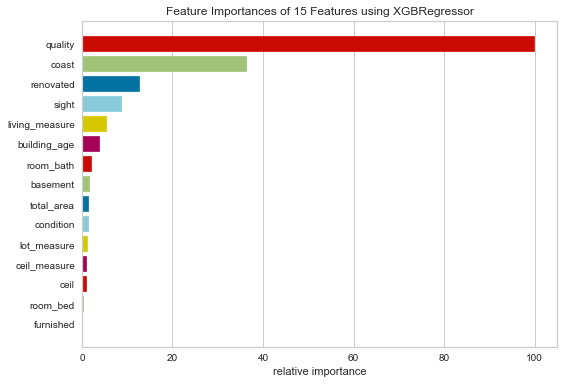

<AxesSubplot:title={'center':'Feature Importances of 15 Features using XGBRegressor'}, xlabel='relative importance'>

In [93]:
xgb_model = XGBRegressor(max_depth=11,learning_rate=0.01,n_estimators=1100, reg_lambda=1.0,random_state =0)
viz = FeatureImportances(xgb_model)
viz.fit(X, y)
viz.show()

In [94]:
pd.Series(xgb_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

quality           0.559899
coast             0.203707
renovated         0.071663
sight             0.049143
living_measure    0.030478
building_age      0.022382
room_bath         0.011818
basement          0.009821
total_area        0.008938
condition         0.008530
lot_measure       0.007860
ceil_measure      0.006533
ceil              0.006338
room_bed          0.002891
furnished         0.000000
dtype: float32

### ADA Boost

In [95]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [96]:
#Created an ada-boosting model
AD_model=AdaBoostRegressor()
AD_model.fit(X_train,y_train)

AdaBoostRegressor()

In [97]:
y_pred_ada = AD_model.predict(X_test)
print('Performance on training data using Ada-boosting:',AD_model.score(X_train,y_train))
print('Performance on testing data using Ada-boosting:',AD_model.score(X_test,y_test))
acc_AD=metrics.r2_score(y_test, y_pred_ada)
print('Accuracy AD: ',acc_AD)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_ada))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_ada))

Performance on training data using Ada-boosting: -0.03671019979909418
Performance on testing data using Ada-boosting: -0.1485312552963154
Accuracy AD:  -0.1485312552963154
MSE:  145811308638.4534
MAE: 334667.7541904856


#### Tuning 

In [98]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'loss': ['linear', 'square', 'exponential'],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
}

clf = GridSearchCV(estimator=AD_model,param_grid=parameters,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20]},
             scoring='neg_mean_squared_error')

In [99]:
clf.best_params_

{'learning_rate': 0.98, 'loss': 'exponential', 'n_estimators': 5}

In [100]:
## Predict Train results
y_train_pred = clf.predict(X_train)

## Predict Test results
y_pred = clf.predict(X_test)

In [101]:
#entering metrics score to the metics dataframe
TUNED_AD_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
TUNED_AD_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
TUNED_AD_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for ADA Boosting:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for ADA Boosting:
*******************************
Root mean squared error:  233868.45527266533
R-squared:  0.5993867164227918
Mean Absolute Percentage Error:  0.36546950777407494


In [102]:
model_results = pd.DataFrame([['TUNED ADA Train', TUNED_AD_RMSE_Train, TUNED_AD_R2_Train, TUNED_AD_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  219827.712507      0.646046  0.294307
1    Random Forest Train  153558.404086      0.827285  0.227879
2    Decision Tree Train  172733.177074      0.781459  0.245495
3              KNN Train  197302.601013      0.714867  0.246339
4            Lasso Train  220268.598910      0.644625  0.294606
5            Ridge Train  219869.609630      0.645911  0.294233
6         XG Boost Train  109331.162342      0.912447  0.188609
7        TUNED ADA Train  233868.455273      0.599387  0.365470


In [103]:
#entering metrics score to the metics dataframe
TUNED_AD_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
TUNED_AD_R2_Test = metrics.r2_score(y_test, y_pred) 
TUNED_AD_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for ADA Boosting:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for ADA Boosting:
*******************************
Root mean squared error:  240022.99821916386
R-squared:  0.5462074901206307
Mean Absolute Percentage Error:  0.3720122314329564


In [104]:
model_results = pd.DataFrame([['TUNED ADA Test', TUNED_AD_RMSE_Test, TUNED_AD_R2_Test, TUNED_AD_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  216637.442013      0.630326  0.293538
1    Random Forest Test  192314.253574      0.708677  0.259496
2    Decision Tree Test  217296.966568      0.628072  0.272698
3              KNN Test  206965.646551      0.662598  0.264910
4            Lasso Test  217050.077159      0.628917  0.294134
5            Ridge Test  216759.167594      0.629911  0.293501
6         XG Boost Test  194806.340805      0.701078  0.249215
7        TUNED ADA Test  240022.998219      0.546207  0.372012


### Gradient Boost

In [105]:
#Created a Gradient boosting model
GB_model=GradientBoostingRegressor()
GB_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [106]:
y_pred = GB_model.predict(X_test)
print('Performance on training data using Gradient-boosting:',GB_model.score(X_train,y_train))
print('Performance on testing data using Gradient-boosting:',GB_model.score(X_test,y_test))
acc_GB=metrics.r2_score(y_test, y_pred)
print('Accuracy GB: ',acc_GB)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Gradient-boosting: 0.780518935924395
Performance on testing data using Gradient-boosting: 0.7252873782629572
Accuracy GB:  0.7252873782629572
MSE:  34876026830.14869
MAE: 124202.53227410467


In [107]:
#search best param for gradient boost
param_dist_gb = { "learning_rate": [0.15,0.1,0.05,0.01,0.005,0.001],
            
                 'n_estimators':[100,250,500,750],"max_depth":[9,10,11,12],
             
              "min_samples_leaf": [3,5,7,9]
                 }

gb_gridsearch = RandomizedSearchCV(GB_model,param_dist_gb, random_state=0)

In [108]:
search_gb=gb_gridsearch.fit(X_train, y_train)

search_gb.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 9,
 'max_depth': 12,
 'learning_rate': 0.1}

In [109]:
#build gb mdel with best param
GB_model = GradientBoostingRegressor(learning_rate=0.01,
                                     max_depth=12,
                                     max_features='sqrt',
                                     min_samples_leaf=7,
                                     n_estimators=750)

In [110]:
GB_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=12, max_features='sqrt',
                          min_samples_leaf=7, n_estimators=750)

In [111]:
## Predict Train results
y_train_pred = GB_model.predict(X_train)

## Predict Test results
y_pred = GB_model.predict(X_test)

In [112]:
GB_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
GB_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
GB_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Gradient Boosting:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Gradient Boosting:
*******************************
Root mean squared error:  106843.18752495291
R-squared:  0.9163866308019069
Mean Absolute Percentage Error:  0.17471974125308798


In [113]:
model_results = pd.DataFrame([['GB Train', GB_RMSE_Train, GB_R2_Train, GB_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  219827.712507      0.646046  0.294307
1    Random Forest Train  153558.404086      0.827285  0.227879
2    Decision Tree Train  172733.177074      0.781459  0.245495
3              KNN Train  197302.601013      0.714867  0.246339
4            Lasso Train  220268.598910      0.644625  0.294606
5            Ridge Train  219869.609630      0.645911  0.294233
6         XG Boost Train  109331.162342      0.912447  0.188609
7        TUNED ADA Train  233868.455273      0.599387  0.365470
8               GB Train  106843.187525      0.916387  0.174720


In [114]:
#entering metrics score to the metics dataframe
GB_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
GB_R2_Test = metrics.r2_score(y_test, y_pred) 
GB_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Gradient Boosting")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Gradient Boosting
*******************************
Root mean squared error:  185327.96510888604
R-squared:  0.7294587296135977
Mean Absolute Percentage Error:  0.24792581838138222


In [115]:
model_results = pd.DataFrame([['GB Test', GB_RMSE_Test, GB_R2_Test, GB_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  216637.442013      0.630326  0.293538
1    Random Forest Test  192314.253574      0.708677  0.259496
2    Decision Tree Test  217296.966568      0.628072  0.272698
3              KNN Test  206965.646551      0.662598  0.264910
4            Lasso Test  217050.077159      0.628917  0.294134
5            Ridge Test  216759.167594      0.629911  0.293501
6         XG Boost Test  194806.340805      0.701078  0.249215
7        TUNED ADA Test  240022.998219      0.546207  0.372012
8               GB Test  185327.965109      0.729459  0.247926


### Ensemble Method

In [124]:
## Ensembling Code
# Ensembling rf_model, xgb_model,dt_model - avoided KNN as that involves scaling 

from sklearn.ensemble import VotingRegressor
estim = [('RF',rf_model),('XG',xgb_model),('GB',GB_model)]
vot = VotingRegressor(estim,weights=[1,3,1])
vot.fit(X_train,y_train)
y_train_pred = vot.predict(X_train)
y_test_pred = vot.predict(X_test)

# After these predictions are done compute RMSE, Rsquared and MAPE as earlier

In [125]:
Ensembling_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Ensembling_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Ensembling_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Ensembling:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Ensembling:
*******************************
Root mean squared error:  92358.43251075476
R-squared:  0.9375208433906423
Mean Absolute Percentage Error:  0.1608031796716949


In [126]:
model_results = pd.DataFrame([['Ensembling Train', Ensembling_RMSE_Train, Ensembling_R2_Train, Ensembling_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                    Model           RMSE  Adjusted_r_2      MAPE
0   MultiLinear Reg Train  219827.712507      0.646046  0.294307
1     Random Forest Train  153558.404086      0.827285  0.227879
2     Decision Tree Train  172733.177074      0.781459  0.245495
3               KNN Train  197302.601013      0.714867  0.246339
4             Lasso Train  220268.598910      0.644625  0.294606
5             Ridge Train  219869.609630      0.645911  0.294233
6          XG Boost Train  109331.162342      0.912447  0.188609
7         TUNED ADA Train  233868.455273      0.599387  0.365470
8                GB Train  106843.187525      0.916387  0.174720
9        Ensembling Train  103578.318750      0.921419  0.173576
10       Ensembling Train   92358.432511      0.937521  0.160803


In [127]:
#entering metrics score to the metics dataframe
Ensembling_RMSE_Test = metrics.mean_squared_error(y_test, y_test_pred,squared=False)
Ensembling_R2_Test = metrics.r2_score(y_test, y_test_pred) 
Ensembling_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_test_pred) 


print("Test Results for :Ensembling")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_test_pred))


model_results = pd.DataFrame([['Ensembling Test', Ensembling_RMSE_Test, Ensembling_R2_Test, Ensembling_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

Test Results for :Ensembling
*******************************
Root mean squared error:  192063.26488495708
R-squared:  0.7094370575250788
Mean Absolute Percentage Error:  0.24803560082425302


In [128]:
results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                   Model           RMSE  Adjusted_r_2      MAPE
0   MultiLinear Reg Test  216637.442013      0.630326  0.293538
1     Random Forest Test  192314.253574      0.708677  0.259496
2     Decision Tree Test  217296.966568      0.628072  0.272698
3               KNN Test  206965.646551      0.662598  0.264910
4             Lasso Test  217050.077159      0.628917  0.294134
5             Ridge Test  216759.167594      0.629911  0.293501
6          XG Boost Test  194806.340805      0.701078  0.249215
7         TUNED ADA Test  240022.998219      0.546207  0.372012
8                GB Test  185327.965109      0.729459  0.247926
9        Ensembling Test  190420.819535      0.714385  0.248637
10       Ensembling Test  192063.264885      0.709437  0.248036


### Final

In [121]:
pred_train=xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

(59754.978092023375, 8861186.413365655, 87074.49970736905, 8888505.934981)

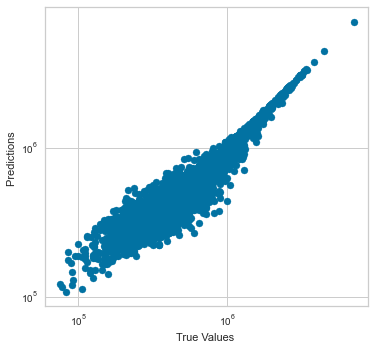

In [122]:
g=plt.scatter(y_test, pred_test)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

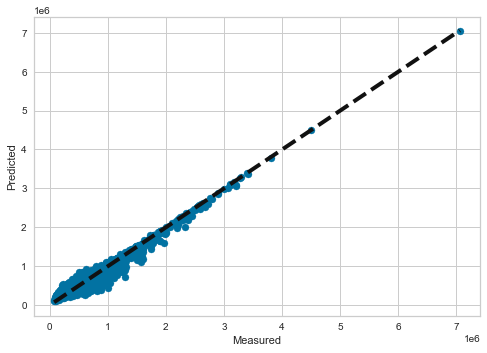

In [123]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show();

## Comparing RSME

In [122]:
index = ['Train_RMSE', 'Test_RMSE']
columns = [
    'LR','RF', 'DT', 'XGB', 'KNN', 'Lasso', 'Ridge', 'XGB', 'ADA','GB'
    'Ensembling',
]
train = [
    LR_RMSE_Train,RF_RMSE_Train, DT_RMSE_Train, XGB_RMSE_Train, KNN_RMSE_Train,
     Lasso_RMSE_Train, Ridge_RMSE_Train, XGB_RMSE_Train,
    TUNED_AD_RMSE_Train, GB ,Ensembling_RMSE_Train
]
test = [
    LR_RMSE_Test,RF_RMSE_Test, DT_RMSE_Test, XGB_RMSE_Test, KNN_RMSE_Test,
    Lasso_RMSE_Test, Ridge_RMSE_Test, XGB_RMSE_Test, TUNED_AD_RMSE_Test,
    Ensembling_RMSE_Test
]

data = pd.DataFrame([train, test], index=index, columns=columns)
round(data, 3)

,LR,RF,DT,XGB,KNN,Lasso,Ridge,XGB,ADA,Ensembling,Stacking
Train_RMSE,219827.713,147757.344,174806.883,120597.520,197302.601,220268.599,219869.610,120597.520,237629.80,106940.431,151314.424
Test_RMSE,216637.442,191520.980,216645.048,190295.955,206965.647,217050.077,216759.168,190295.955,239178.45,194104.273,197368.290


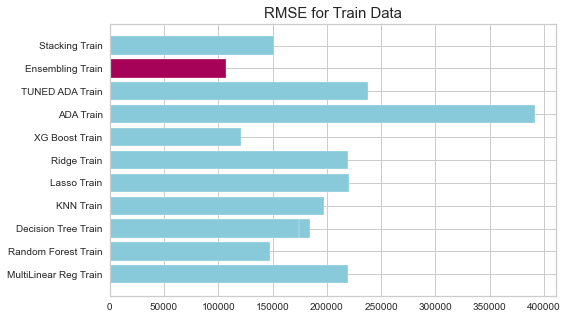

In [123]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_RMSE_index= results_train.RMSE.argmin()
plt.barh(results_train.Model, results_train.RMSE, color='c')
plt.barh(results_train.Model[min_RMSE_index], results_train.RMSE[min_RMSE_index], color='m')
plt.title("RMSE for Train Data", size=15);
plt.show()

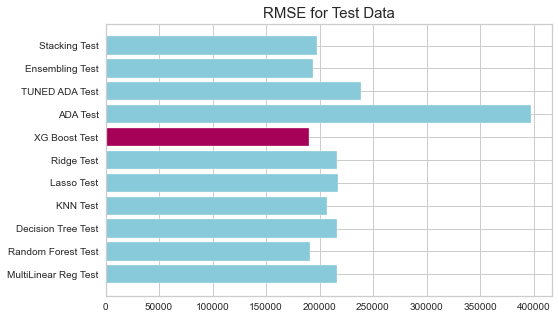

In [124]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_RMSE_index= results_test.RMSE.argmin()
plt.barh(results_test.Model, results_test.RMSE, color='c')
plt.barh(results_test.Model[min_RMSE_index], results_test.RMSE[min_RMSE_index], color='m')
plt.title("RMSE for Test Data", size=15);
plt.show()

## Comparing Adjusted R_2

In [125]:
index = ['Train_Adjusted_R_Square', 'Test_Adjusted_R_Square']
columns = [
    'LR','RF', 'DT', 'XGB', 'KNN', 'Lasso', 'Ridge', 'XGB', 'ADA',
    'Emsebling', 'Stacking'
]
train = [
    LR_R2_Train,RF_R2_Train, DT_R2_Train, XGB_R2_Train, KNN_R2_Train,
    Lasso_R2_Train, Ridge_R2_Train, XGB_R2_Train, TUNED_AD_R2_Train,
    Ensembling_R2_Train, Stack_R2_Test
]
test = [
    LR_R2_Test,RF_R2_Test, DT_R2_Test, XGB_R2_Test, KNN_R2_Test,
    Lasso_R2_Test, Ridge_R2_Test, XGB_R2_Test, TUNED_AD_R2_Test,
    Ensembling_R2_Test,Stack_R2_Test
]

data = pd.DataFrame([train, test], index=index, columns=columns)
round(data, 3)

,LR,RF,DT,XGB,KNN,Lasso,Ridge,XGB,ADA,Emsebling,Stacking
Train_Adjusted_R_Square,0.646,0.840,0.776,0.893,0.715,0.645,0.646,0.893,0.586,0.916,0.693
Test_Adjusted_R_Square,0.630,0.711,0.630,0.715,0.663,0.629,0.630,0.715,0.549,0.703,0.693


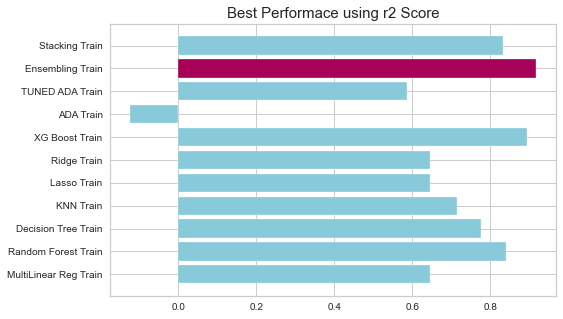

In [126]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
max_Adjusted_r_2_index= results_train.Adjusted_r_2.argmax()
plt.barh(results_train.Model, results_train.Adjusted_r_2, color='c')
plt.barh(results_train.Model[max_Adjusted_r_2_index], results_train.Adjusted_r_2[max_Adjusted_r_2_index], color='m')
plt.title("Best Performace using r2 Score", size=15);
plt.show()

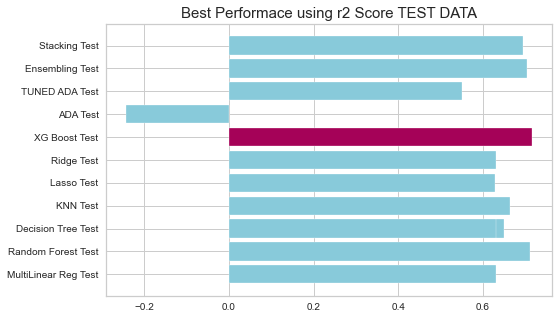

In [127]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
max_Adjusted_r_2_index= results_test.Adjusted_r_2.argmax()
plt.barh(results_test.Model, results_test.Adjusted_r_2, color='c')
plt.barh(results_test.Model[max_Adjusted_r_2_index], results_test.Adjusted_r_2[max_Adjusted_r_2_index], color='m')
plt.title("Best Performace using r2 Score TEST DATA", size=15);
plt.show()

## Comparing MAPE

In [128]:
index = ['Train_MAPE', 'Test_MAPE']
columns = [
    'LR','RF', 'DT', 'XGB', 'KNN', 'Lasso', 'Ridge', 'ADA', 'Ensembling','Stacking'
]
train = [
   LR_MAPE_Train, RF_MAPE_Train, DT_MAPE_Train, XGB_MAPE_Train, KNN_MAPE_Train,
     Lasso_MAPE_Train, Ridge_MAPE_Train, TUNED_AD_MAPE_Train,
    Ensembling_MAPE_Train, Stack_MAPE_Train
]
test = [
    LR_MAPE_Test, RF_MAPE_Test, DT_MAPE_Test, XGB_MAPE_Test, KNN_MAPE_Test,
    Lasso_MAPE_Test, Ridge_MAPE_Test, TUNED_AD_MAPE_Test, Ensembling_MAPE_Test, Stack_MAPE_Test
]

data = pd.DataFrame([train, test], index=index, columns=columns)
round(data, 3)

,LR,RF,DT,XGB,KNN,Lasso,Ridge,ADA,Ensembling,Stacking
Train_MAPE,0.294,0.208,0.246,0.197,0.246,0.295,0.294,0.348,0.179,0.195
Test_MAPE,0.294,0.254,0.273,0.250,0.265,0.294,0.294,0.354,0.250,0.255


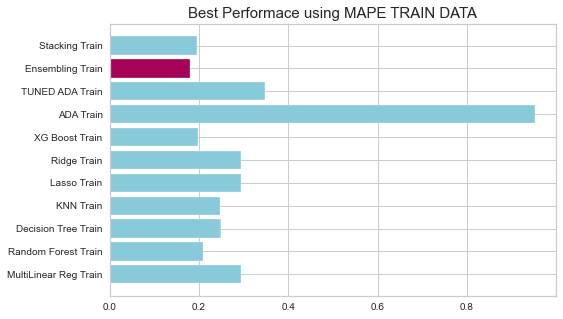

In [129]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_MAPE_index= results_train.MAPE.argmin()
plt.barh(results_train.Model, results_train.MAPE, color='c')
plt.barh(results_train.Model[min_MAPE_index], results_train.MAPE[min_MAPE_index], color='m')
plt.title("Best Performace using MAPE TRAIN DATA", size=15);
plt.show()

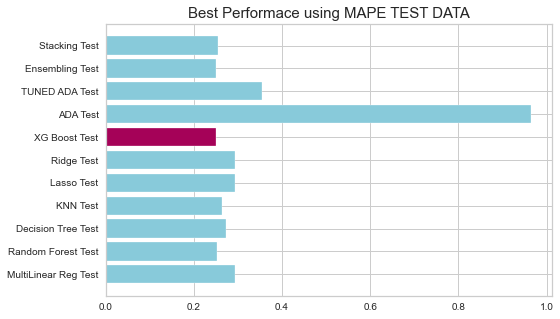

In [130]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_MAPE_index= results_test.MAPE.argmin()
plt.barh(results_test.Model, results_test.MAPE, color='c')
plt.barh(results_test.Model[min_MAPE_index], results_test.MAPE[min_MAPE_index], color='m')
plt.title("Best Performace using MAPE TEST DATA", size=15);
plt.show()

## Final Comparison 

In [131]:
index = ['RMSE', 'Adjusted_R_Square', 'MAPE']
data = pd.DataFrame(
    {
        'MultiLinear Reg Train': [LR_RMSE_Train, LR_R2_Train, LR_MAPE_Train],
        'MultiLinear Reg Test': [LR_RMSE_Test, LR_R2_Test, LR_MAPE_Test],
        'Random Forest Train': [RF_RMSE_Train, RF_R2_Train, RF_MAPE_Train],
        'Random Forest Test': [RF_RMSE_Test, RF_R2_Test, RF_MAPE_Test],
        'Decision Tree Train': [DT_RMSE_Train, DT_R2_Train, DT_MAPE_Train],
        'Decision Tree Test': [DT_RMSE_Test, DT_R2_Test, DT_MAPE_Test],
        'XG Boost Train': [XGB_RMSE_Train, XGB_R2_Train, XGB_MAPE_Train],
        'XG Boost Test': [XGB_RMSE_Test, XGB_R2_Test, XGB_MAPE_Test],
        'KNN Train': [KNN_RMSE_Train, KNN_R2_Train, KNN_MAPE_Train],
        'KNN Test': [KNN_RMSE_Test, KNN_R2_Test, KNN_MAPE_Test],
        'Lasso Regression Train':
        [Lasso_RMSE_Train, Lasso_R2_Train, Lasso_MAPE_Train],
        'Lasso Regression Test':
        [Lasso_RMSE_Test, Lasso_R2_Test, Lasso_MAPE_Test],
        'Ridge Train': [Ridge_RMSE_Train, Ridge_R2_Train, Ridge_MAPE_Train],
        'Ridge Test': [Ridge_RMSE_Test, Ridge_R2_Test, Ridge_MAPE_Test],
        'ADA Boost Train':
        [TUNED_AD_RMSE_Train, TUNED_AD_R2_Train, TUNED_AD_MAPE_Train],
        'ADA Boost Test':
        [TUNED_AD_RMSE_Test, TUNED_AD_R2_Test, TUNED_AD_MAPE_Test],
        'Emsembling Train':
        [Ensembling_RMSE_Train, Ensembling_R2_Train, Ensembling_MAPE_Train],
        'Emsembling Test':
        [Ensembling_RMSE_Test, Ensembling_R2_Test, Ensembling_MAPE_Test],
        'Stacking Train':
        [Stack_RMSE_Train, Stack_R2_Train, Stack_MAPE_Train],
        'Stacking Test':
        [Stack_RMSE_Test, Stack_R2_Test, Stack_MAPE_Test]
        
    },
    index=index)
round(data, 2)

,MultiLinear Reg Train,MultiLinear Reg Test,Random Forest Train,Random Forest Test,Decision Tree Train,Decision Tree Test,XG Boost Train,XG Boost Test,KNN Train,KNN Test,Lasso Regression Train,Lasso Regression Test,Ridge Train,Ridge Test,ADA Boost Train,ADA Boost Test,Emsembling Train,Emsembling Test,Stacking Train,Stacking Test
RMSE,219827.71,216637.44,147757.34,191520.98,174806.88,216645.05,120597.52,190295.96,197302.60,206965.65,220268.60,217050.08,219869.61,216759.17,237629.80,239178.45,106940.43,194104.27,151314.42,197368.29
Adjusted_R_Square,0.65,0.63,0.84,0.71,0.78,0.63,0.89,0.71,0.71,0.66,0.64,0.63,0.65,0.63,0.59,0.55,0.92,0.70,0.83,0.69
MAPE,0.29,0.29,0.21,0.25,0.25,0.27,0.20,0.25,0.25,0.26,0.29,0.29,0.29,0.29,0.35,0.35,0.18,0.25,0.20,0.25


In [132]:
index = ['RMSE', 'Adjusted_R_Square', 'MAPE']
data = pd.DataFrame(
    {
        'MultiLinear Reg Test':[LR_RMSE_Test, LR_R2_Test, LR_MAPE_Test],
        'Random Forest Test': [RF_RMSE_Test, RF_R2_Test, RF_MAPE_Test],
        'Decision Tree Test': [DT_RMSE_Test, DT_R2_Test, DT_MAPE_Test],
        'XG Boost Test': [XGB_RMSE_Test, XGB_R2_Test, XGB_MAPE_Test],
        'KNN Test': [KNN_RMSE_Test, KNN_R2_Test, KNN_MAPE_Test],
        'Lasso Regression Test':
        [Lasso_RMSE_Test, Lasso_R2_Test, Lasso_MAPE_Test],
        'Ridge Test': [Ridge_RMSE_Test, Ridge_R2_Test, Ridge_MAPE_Test],
        'Tuned ADA Test':
        [TUNED_AD_RMSE_Test, TUNED_AD_R2_Test, TUNED_AD_MAPE_Test],
        'Emsembling Test':
        [Ensembling_RMSE_Test, Ensembling_R2_Test, Ensembling_MAPE_Test],
        'Stacking Test':
        [Stack_RMSE_Test, Stack_R2_Test, Stack_MAPE_Test]
    },
    index=index)
round(data, 2)

,MultiLinear Reg Test,Random Forest Test,Decision Tree Test,XG Boost Test,KNN Test,Lasso Regression Test,Ridge Test,Tuned ADA Test,Emsembling Test,Stacking Test
RMSE,216637.44,191520.98,216645.05,190295.96,206965.65,217050.08,216759.17,239178.45,194104.27,197368.29
Adjusted_R_Square,0.63,0.71,0.63,0.71,0.66,0.63,0.63,0.55,0.70,0.69
MAPE,0.29,0.25,0.27,0.25,0.26,0.29,0.29,0.35,0.25,0.25
